# Customers Segmentation
https://www.kaggle.com/datasets/shwetabh123/mall-customers/

## This program uses DBScan and KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


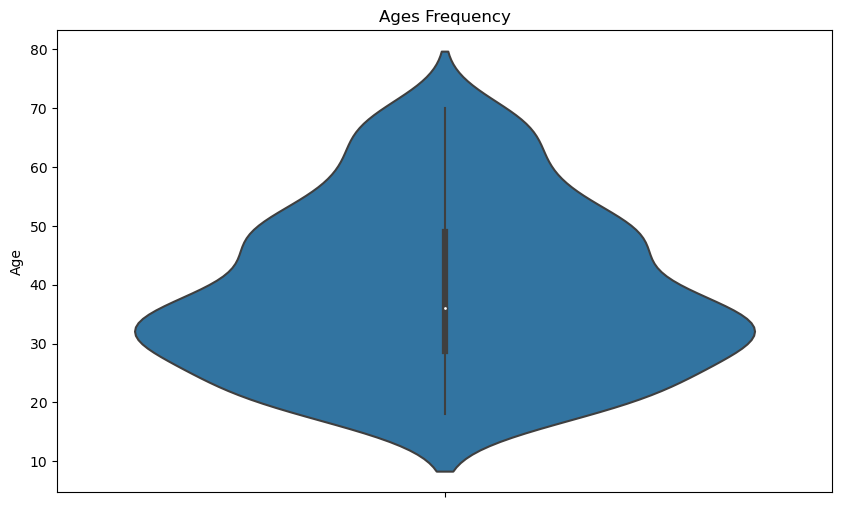

In [3]:
# age frequency of customers
df.drop(["CustomerID"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

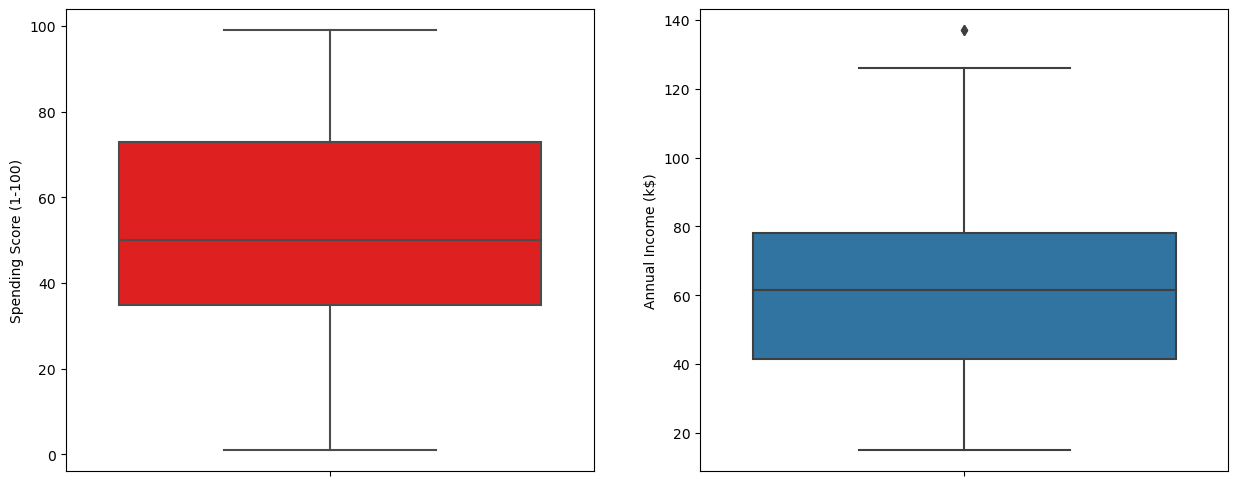

In [4]:
# spending score and annual income
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

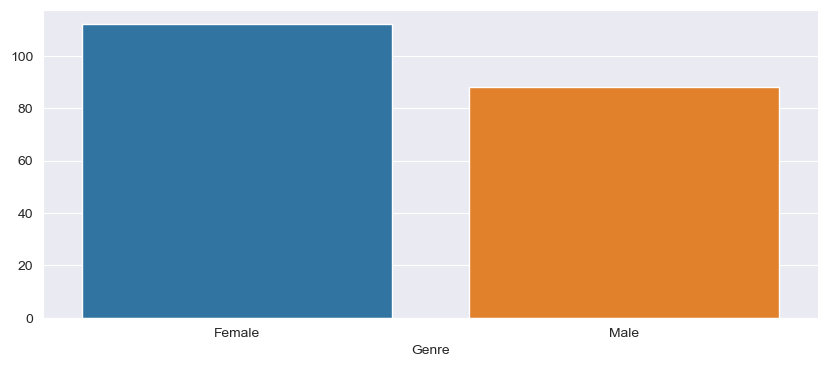

In [5]:
# distribution of male and female population in the dataset
genders = df.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

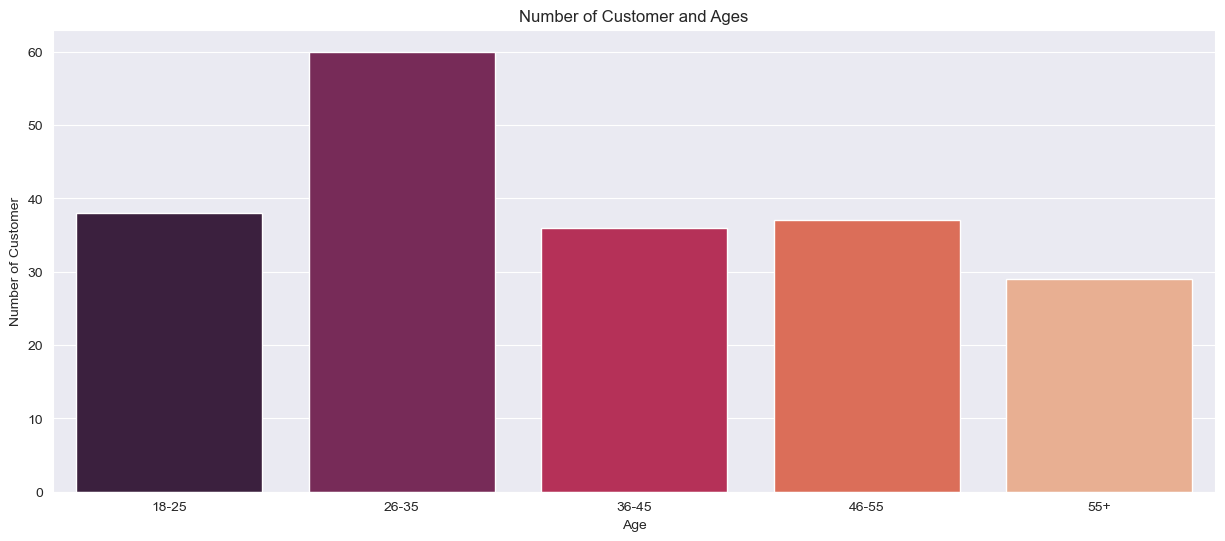

In [6]:
# distribution of number of customers in each age group
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

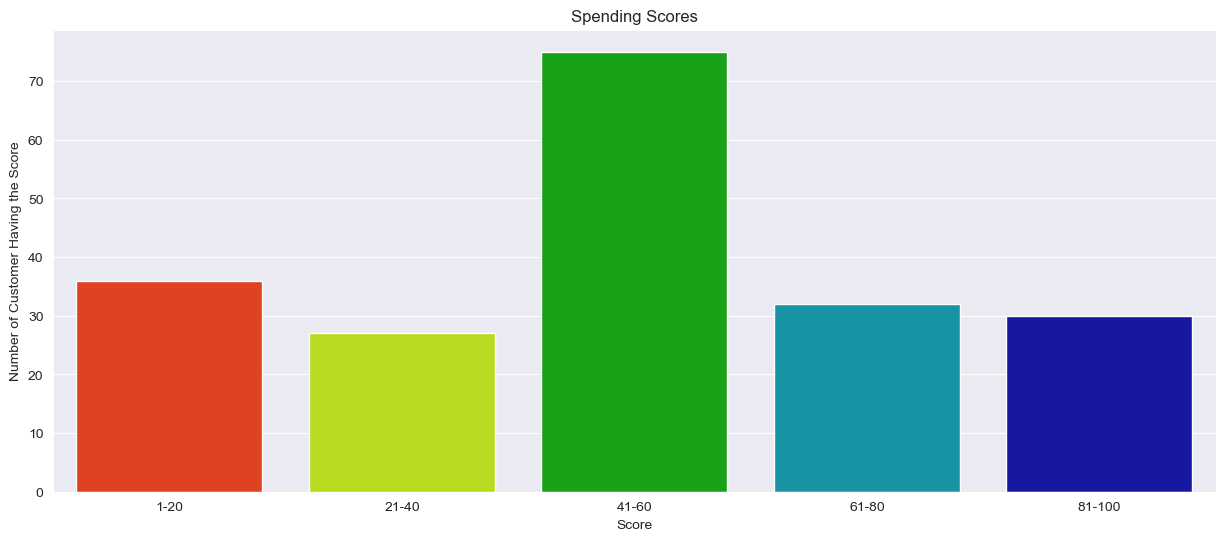

In [7]:
# number of customers according to their spending scores
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

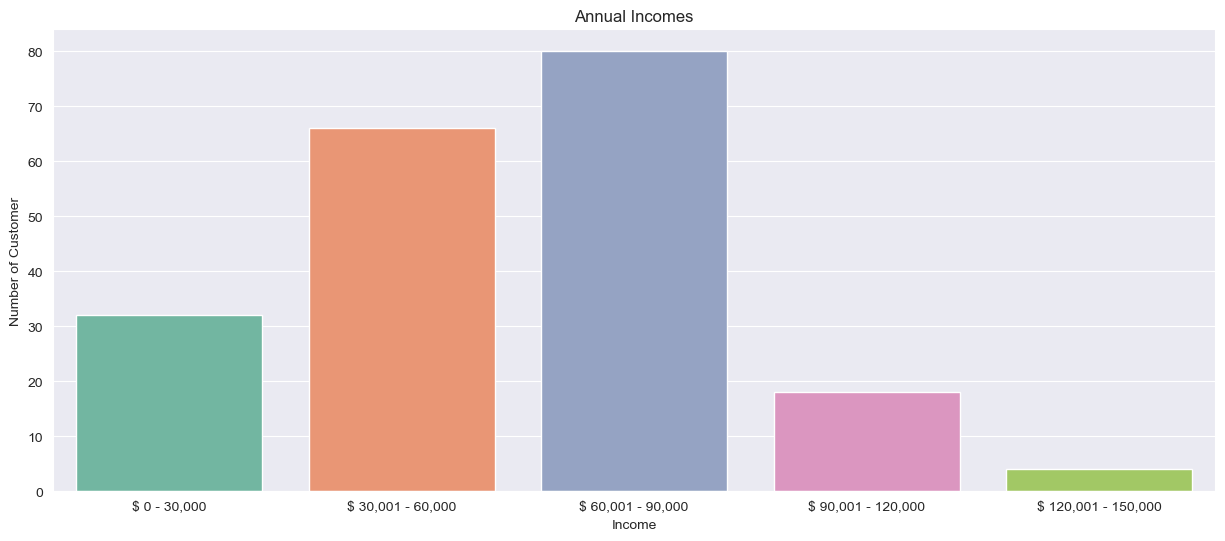

In [8]:
# number of customers according to their annual income
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# Apply K-Means

In [9]:
from sklearn.cluster import KMeans
k=5
df_kmeans=df.copy()
kmeans = KMeans(n_clusters=k, init="k-means++")
clusters=kmeans.fit_predict(df.iloc[:,1:])
df_kmeans["label"] = clusters

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


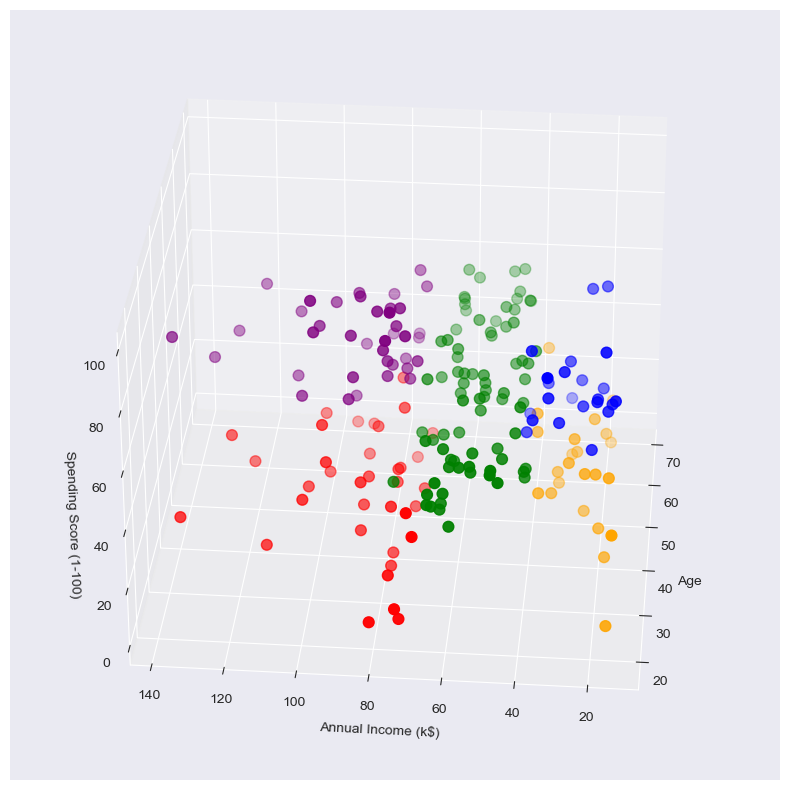

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_kmeans.Age[df_kmeans.label == 0], df_kmeans["Annual Income (k$)"][df_kmeans.label == 0], df_kmeans["Spending Score (1-100)"][df_kmeans.label == 0], c='blue', s=60)
ax.scatter(df_kmeans.Age[df_kmeans.label == 1], df_kmeans["Annual Income (k$)"][df_kmeans.label == 1], df_kmeans["Spending Score (1-100)"][df_kmeans.label == 1], c='red', s=60)
ax.scatter(df_kmeans.Age[df_kmeans.label == 2], df_kmeans["Annual Income (k$)"][df_kmeans.label == 2], df_kmeans["Spending Score (1-100)"][df_kmeans.label == 2], c='green', s=60)
ax.scatter(df_kmeans.Age[df_kmeans.label == 3], df_kmeans["Annual Income (k$)"][df_kmeans.label == 3], df_kmeans["Spending Score (1-100)"][df_kmeans.label == 3], c='orange', s=60)
ax.scatter(df_kmeans.Age[df_kmeans.label == 4], df_kmeans["Annual Income (k$)"][df_kmeans.label == 4], df_kmeans["Spending Score (1-100)"][df_kmeans.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## Apply DBSCAN

# MinPoint and eps value for DBSCAN
MinPoint=2 x Dimension

In [12]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nn = neigh.fit(df.iloc[:,1:])
dist, idx = nn.kneighbors(df.iloc[:,1:])
dist=np.sort(dist[:,1], axis=0)

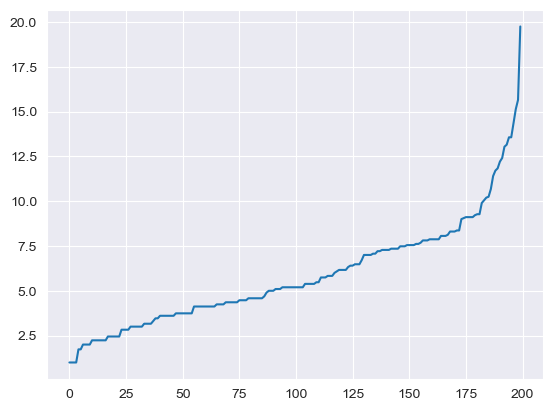

In [13]:
plt.plot(dist)

In [14]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
from sklearn.cluster import DBSCAN
df_dbscan=df.copy()
dbscan = DBSCAN(eps=50, min_samples=8)
dbscan.fit_predict(df.iloc[:,1:])
df_dbscan["label"] = clusters

In [16]:
df_dbscan["label"].unique()

array([3, 0, 2, 4, 1])

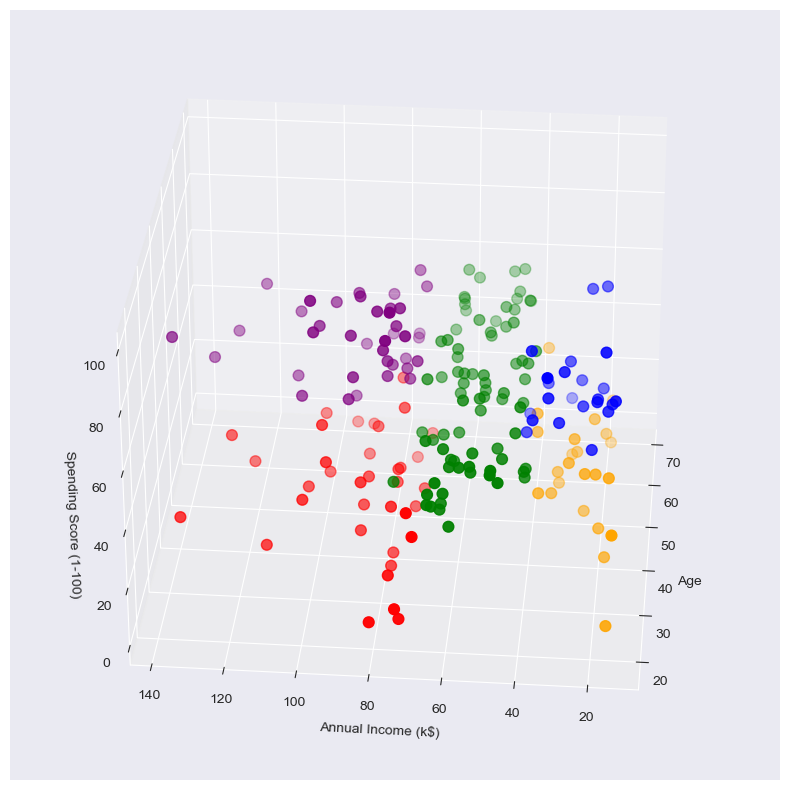

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dbscan.Age[df_dbscan.label == 0], df_dbscan["Annual Income (k$)"][df_dbscan.label == 0], df_dbscan["Spending Score (1-100)"][df_dbscan.label == 0], c='blue', s=60)
ax.scatter(df_dbscan.Age[df_dbscan.label == 1], df_dbscan["Annual Income (k$)"][df_dbscan.label == 1], df_dbscan["Spending Score (1-100)"][df_dbscan.label == 1], c='red', s=60)
ax.scatter(df_dbscan.Age[df_dbscan.label == 2], df_dbscan["Annual Income (k$)"][df_dbscan.label == 2], df_dbscan["Spending Score (1-100)"][df_dbscan.label == 2], c='green', s=60)
ax.scatter(df_dbscan.Age[df_dbscan.label == 3], df_dbscan["Annual Income (k$)"][df_dbscan.label == 3], df_dbscan["Spending Score (1-100)"][df_dbscan.label == 3], c='orange', s=60)
ax.scatter(df_dbscan.Age[df_dbscan.label == 4], df_dbscan["Annual Income (k$)"][df_dbscan.label == 4], df_dbscan["Spending Score (1-100)"][df_dbscan.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()